In [96]:
import matplotlib.pyplot as plt 
import plotly.express as px 
import numpy as np 
plt.style.use('./deeplearning.mplstyle')

In [97]:
%config InlineBackend.figure_format = 'svg'

# Lab 02

Let's start with a simple example of linear regression. 
I will be using a function $f_{w, b}$ for univariate linear regression, i.e. a single input variable. 

The notation I will be using is as follows: 

| General <img width=70/> <br /> Notation <img width=70/> | Description <img width=350/> | Python (if applicable) |
| :------------------------------------------------------- | :-------------------------- | :--------------------- |
| $a$                                                      | scalar, non bold            |                        |
| $\mathbf{a}$                                             | vector, bold                |                        |
| **Regression**                                           |                             |                        |
| $\mathbf{x}$                                             | Training example feature values (in this lab - Size (1000 sqft)) | `x_train` |
| $\mathbf{y}$                                             | Training example targets (in this lab - Price (1000s of dollars)) | `y_train` |
| $x^{(i)}$, $y^{(i)}$                                     | $i$-th training example     | `x_i`, `y_i`          |
| $m$                                                      | Number of training examples | `m`                   |
| $w$                                                      | Parameter: weight           | `w`                   |
| $b$                                                      | Parameter: bias             | `b`                   |
| $f_{w,b}(x^{(i)})$                                       | The result of the model evaluation at $x^{(i)}$ parameterized by $w,b$: $f_{w,b}(x^{(i)}) = wx^{(i)} + b$ | `f_wb` |

## Libraries

I will be using the following libraries:

- `numpy` for vectorized operations
- `matplotlib` for plotting
- `plotly` for interactive plotting

## Problem Statement

This dataset only comprises two entries. 

The **feature** values are the size of the house in 1000s of square feet, whereas the **target** values are the price of the house in 1000s of dollars.

|`x`:  **Size (1000 sqft)** |`y`:  **Price (1000s of dollars)** |
| :-------------------     | :--------------------------- |
| 1.0                      | 300.0                        |
| 2.0                      | 500.0                        |

Predict the price of a house of any size, using a linear regression model for the given data.

### Training Data

In [98]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

In [99]:
x_train 

array([1., 2.])

In [100]:
y_train

array([300., 500.])

### Number of training examples

In [101]:
m = x_train.shape[0]

### Plotting the data

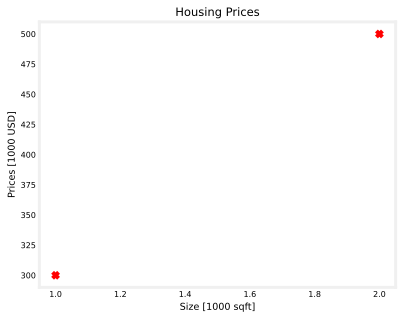

In [102]:
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title('Housing Prices')
plt.ylabel('Prices [1000 USD]')
plt.xlabel('Size [1000 sqft]')
plt.show()

Let's do this with seaborn.

In [103]:
import seaborn as sns

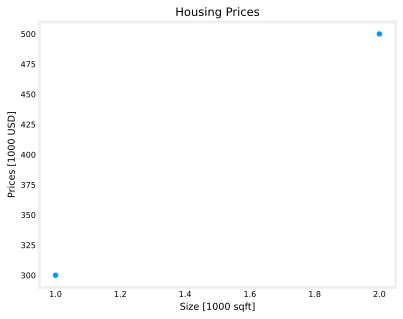

In [104]:
fig = sns.scatterplot(x=x_train, y=y_train)
plt.title('Housing Prices')
plt.xlabel('Size [1000 sqft]')
plt.ylabel('Prices [1000 USD]')
plt.show()

Let's also plot the data using plotly.

In [105]:
fig = px.scatter(x=x_train, y=y_train, title='Housing Prices')
fig.update_traces(
    marker_color='#9162ca',
    marker_opacity=1,
    marker_symbol='cross',
    marker_size=15
)
fig.update_layout(height=500, width=600)
fig.show()

### Fitting the line

I will be using a function $f_{w, b}$ in the form of $f_{w, b}(x) = wx + b$. 

In [106]:
w = 200
b = 100

In [107]:
def f_wb(w, b, x):
    return w * x + b  

In [108]:
y_hat = f_wb(w, b, x_train)

In [109]:
y_hat

array([300., 500.])

### Plotting the output

In [110]:
fig = px.line(x=x_train, y=y_hat, title='Linear Prediction')
fig.add_scatter(x=x_train, y=y_train)
fig.update_traces(
    marker_color='#9162ca',
    marker_opacity=0.3,
    marker_symbol='cross',
    marker_size=15
)
fig.update_xaxes()
fig.update_layout(width=600, height=500)
fig.show()

### Predicting the price of a house of size 1200 sqft

In [111]:
desired_size = 1.2 # [1.2 * 1000 sqft]
predicted_price = f_wb(w, b, desired_size)

In [113]:
print(f"Predicted Price for a {1.2 * 1000} sqft house is {predicted_price * 1000} USD")

Predicted Price for a 1200.0 sqft house is 340000.0 USD
